<a href="https://colab.research.google.com/github/shyamjith94/TimeSeriesDataAnalysis/blob/main/SimpleARmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from statsmodels.tsa.ar_model import AR, ARResults

from sklearn.metrics import mean_squared_error

In [4]:
data = pd.read_csv("/content/drive/My Drive/TimeSeriesDataAnalysis/Data/uspopulation.csv", parse_dates=True, index_col='DATE')
data.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2011-01-01 to 2018-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PopEst  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [8]:
data.index.freq = 'MS'
data.index

DatetimeIndex(['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01',
               '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
      

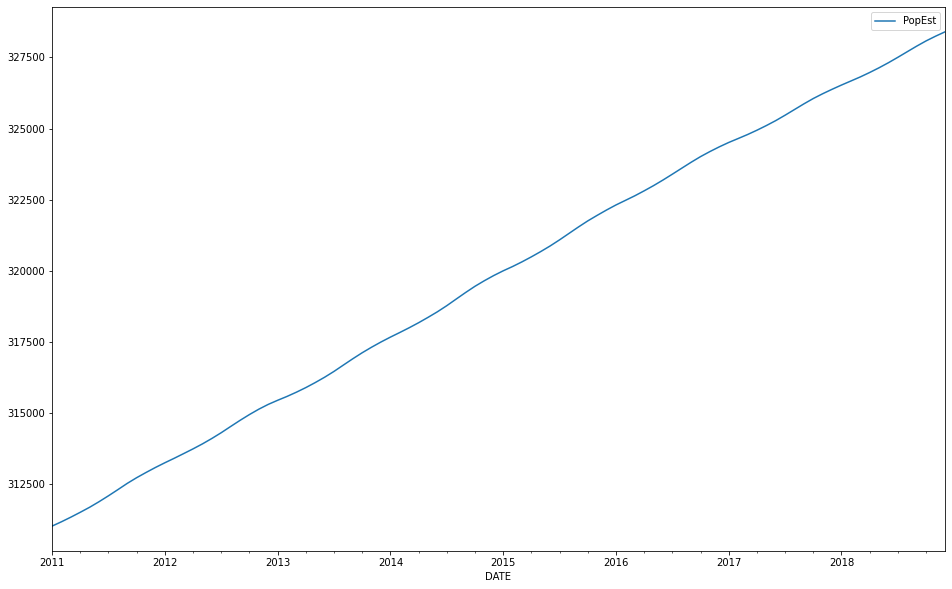

In [10]:
data.plot(figsize=(16,10))

In [14]:
train_data = data.iloc[:84]
test_data = data.iloc[84:]

**AR model order one**

In [15]:
model = AR(train_data['PopEst'])

In [16]:
fitted_model = model.fit(maxlag=1)  # order of auto regression maxlag we using one lag

In [17]:
fitted_model.k_ar # order of lag

1

In [18]:
fitted_model.params # params of model

const        284.913797
L1.PopEst      0.999686
dtype: float64

In [21]:
start = len(train_data)
end = len(train_data) + len(test_data) - 1
print(start)
print(end)

84
95


In [29]:
prediction_one = fitted_model.predict(start=start, end=end).rename('AR(1) Predictions')
prediction_one

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, Name: AR(1) Predictions, dtype: float64

In [23]:
test_data

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893


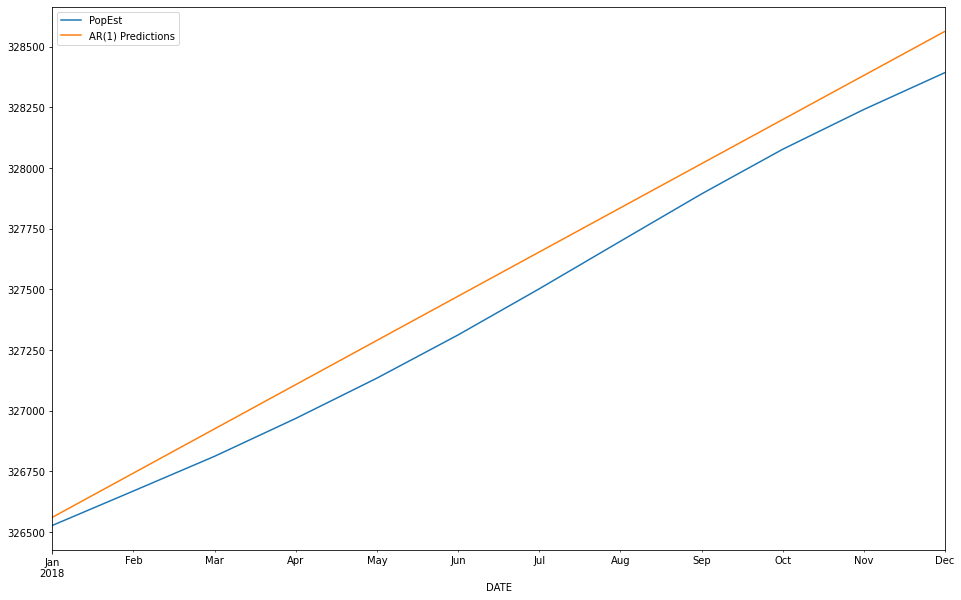

In [30]:
test_data.plot(figsize=(16,10), legend=True)
prediction_one.plot(legend=True)

**AR model order two**

In [31]:
fitted_model_2 = model.fit(maxlag=2)

In [34]:
fitted_model_2.params

const        137.368305
L1.PopEst      1.853490
L2.PopEst     -0.853836
dtype: float64

In [35]:
prediction_two = fitted_model_2.predict(start=start, end=end).rename('AR(2) Predictions')
prediction_two

2018-01-01    326535.672503
2018-02-01    326694.718510
2018-03-01    326854.882250
2018-04-01    327015.944949
2018-05-01    327177.719499
2018-06-01    327340.045897
2018-07-01    327502.787331
2018-08-01    327665.826848
2018-09-01    327829.064481
2018-10-01    327992.414811
2018-11-01    328155.804861
2018-12-01    328319.172309
Freq: MS, Name: AR(2) Predictions, dtype: float64

In [36]:
test_data

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893


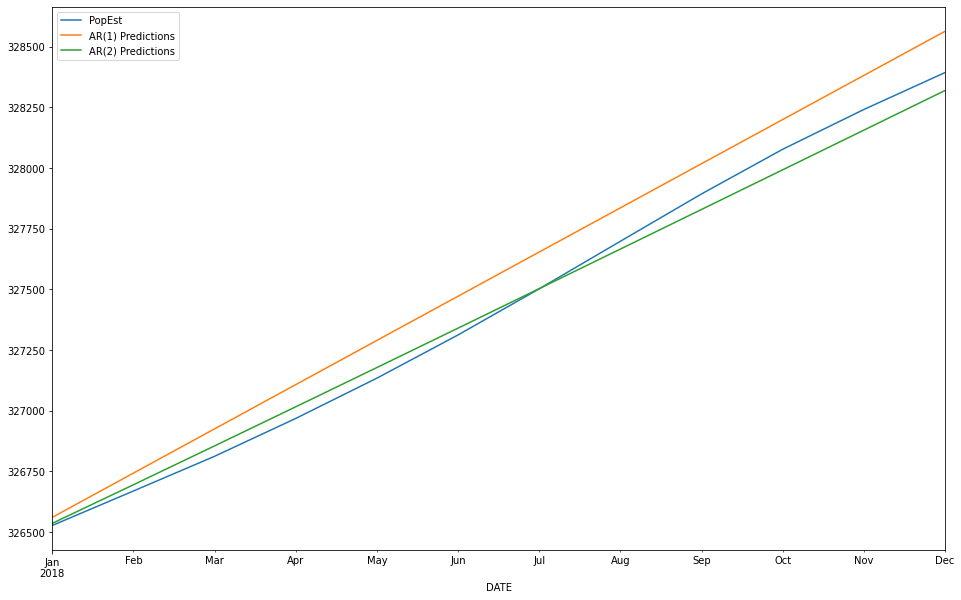

In [37]:
test_data.plot(figsize=(16,10), legend=True)
prediction_one.plot(legend=True)
prediction_two.plot(legend=True)

**Auto choose lag value**

In [38]:
fitted_model_3 = model.fit(ic='t-stat')

In [39]:
fitted_model_3.params

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

In [41]:
prediction_eight = fitted_model_3.predict(start=start, end=end).rename('AR(8) Predictions')
prediction_eight

2018-01-01    326523.865558
2018-02-01    326662.772568
2018-03-01    326805.746869
2018-04-01    326960.064200
2018-05-01    327130.572900
2018-06-01    327315.962730
2018-07-01    327511.010030
2018-08-01    327710.938274
2018-09-01    327907.425442
2018-10-01    328092.870661
2018-11-01    328264.133548
2018-12-01    328421.667091
Freq: MS, Name: AR(8) Predictions, dtype: float64

In [45]:
label = ['AR1', 'AR2', 'AR8']

In [46]:
pred = [prediction_one, prediction_two, prediction_eight]

In [48]:
for i in range(3):
    error = mean_squared_error(test_data['PopEst'], pred[i])
    print(f'{label[i]} MSE was:-\t{error}')

AR1 MSE was:-	17449.71423587912
AR2 MSE was:-	2713.2585540102214
AR8 MSE was:-	186.97053754548145


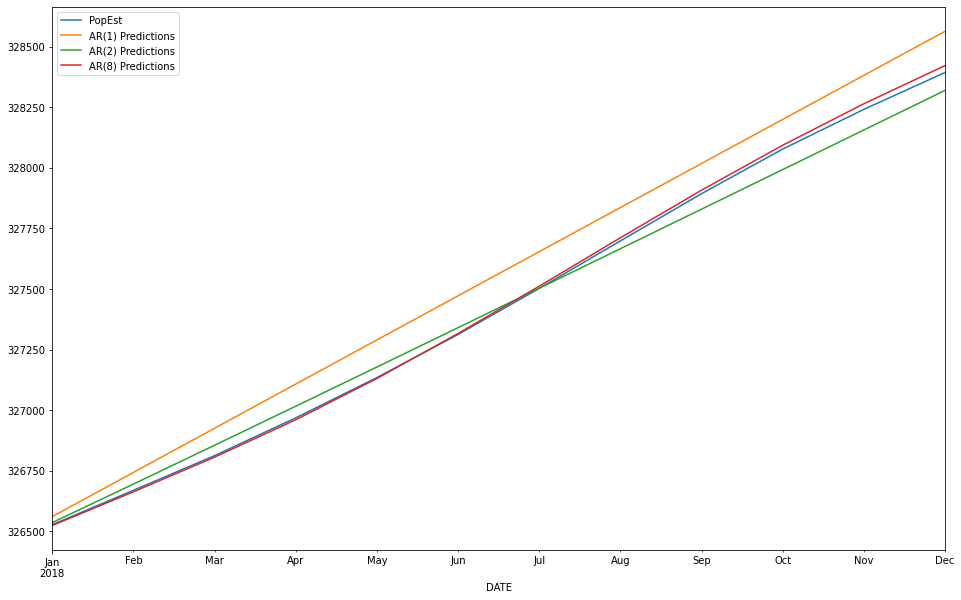

In [49]:
test_data.plot(figsize=(16,10), legend=True)
prediction_one.plot(legend=True)
prediction_two.plot(legend=True)
prediction_eight.plot(legend=True)

**Forcasting future**

In [50]:
final_model = AR(data['PopEst'])

In [51]:
fitted_model_final = final_model.fit()

In [52]:
start = len(data)
end = len(data) + 12 # 12 is forecasting months in future
forcated_values = fitted_model_final.predict(start=start, end=end).rename('Forecat')

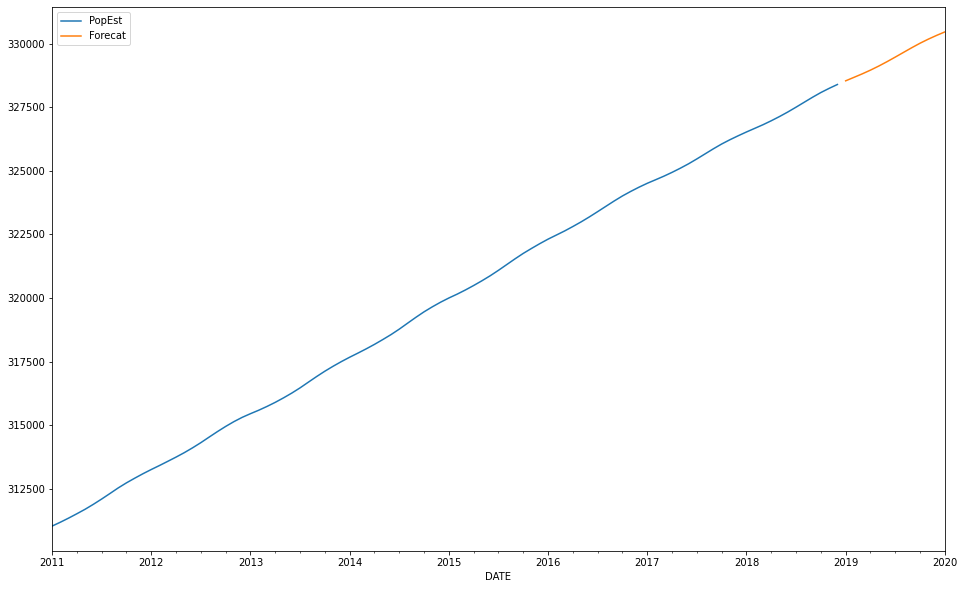

In [54]:
data.plot(figsize=(16, 10), legend=True)
forcated_values.plot(figsize=(16, 10), legend=True)

In [55]:
# forcating to 24 month
start = len(data)
end = len(data) + 24 # 24 is forecasting months in future
forcated_values = fitted_model_final.predict(start=start, end=end).rename('Forecat')

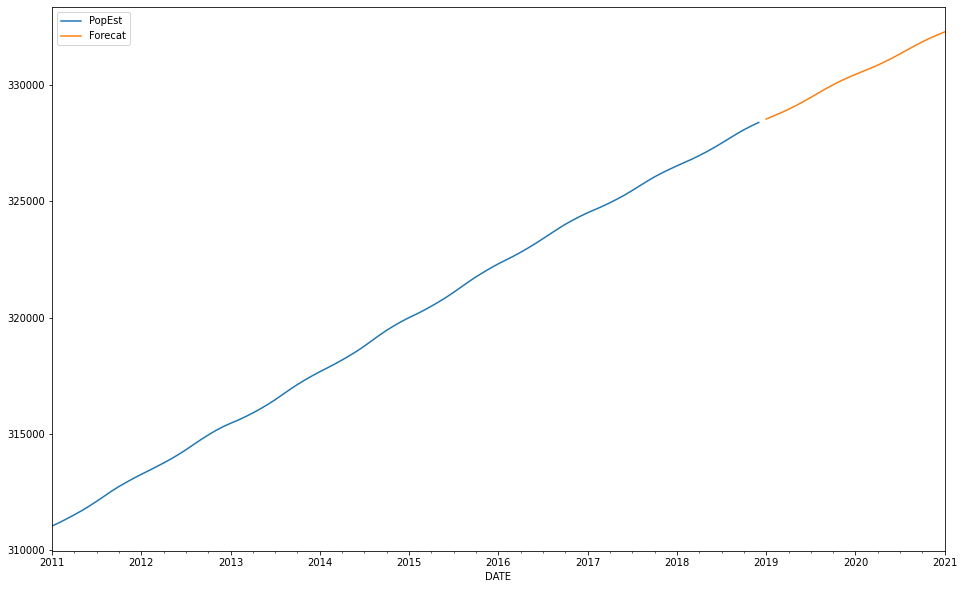

In [56]:
data.plot(figsize=(16, 10), legend=True)
forcated_values.plot(figsize=(16, 10), legend=True)